In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [60]:
df = pd.read_csv('updated_ecommerce_dataset.csv')
df.head()

,Age,Gender,Time_Spent,Product_Category,Number_of_Items_Viewed,Device_Used,Purchased
0,24,Male,11,Books,1,Tablet,1
1,56,Male,9,Books,7,Desktop,0
2,38,Male,6,Electronics,7,Tablet,0
3,26,Male,39,Electronics,4,Tablet,1
4,29,Female,16,Books,5,Tablet,1


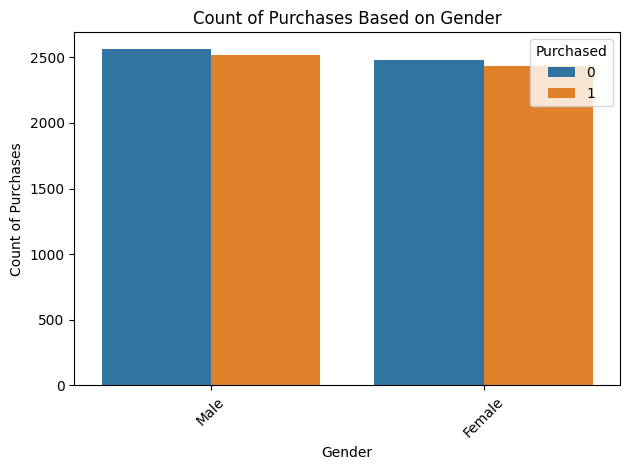

In [61]:
sns.countplot(x='Gender', hue='Purchased', data=df)

plt.title('Count of Purchases Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Purchases')

plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout
plt.show()

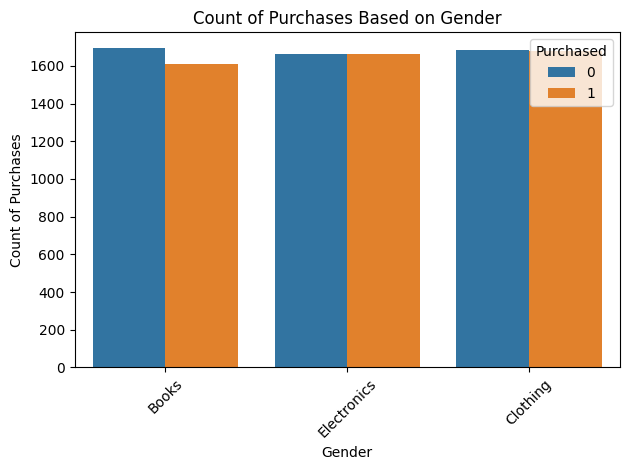

In [62]:
sns.countplot(x='Product_Category', hue='Purchased', data=df)

plt.title('Count of Purchases Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Purchases')

plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout
plt.show()

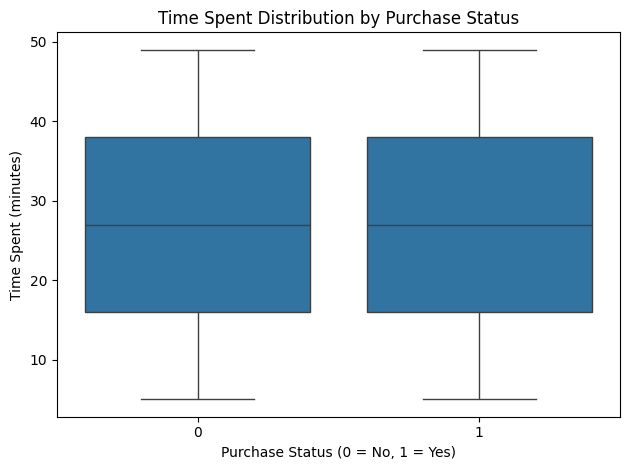

In [63]:
# Boxplot to show the distribution of time spent based on purchase status
sns.boxplot(x='Purchased', y='Time_Spent', data=df)

plt.title('Time Spent Distribution by Purchase Status')
plt.xlabel('Purchase Status (0 = No, 1 = Yes)')
plt.ylabel('Time Spent (minutes)')
plt.tight_layout()
plt.show()


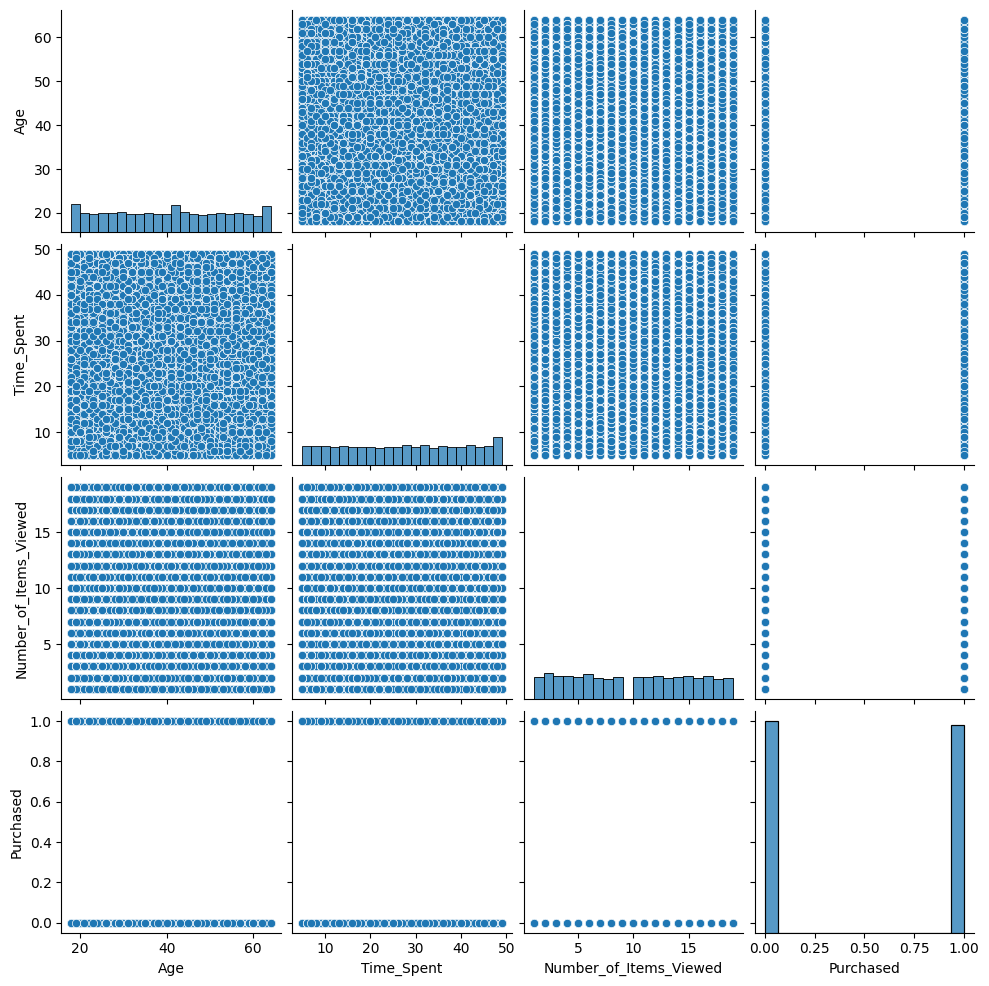

In [64]:
sns.pairplot(df)

# Show the plot
plt.show()

In [65]:
# Define the function to assign age group based on if conditions
def assign_age_group(row):
    if 18 <= row['Age'] <= 30:
        return 'Young Adults'
    elif 31 <= row['Age'] <= 45:
        return 'Middle-Aged'
    elif 46 <= row['Age'] <= 64:
        return 'Seniors'
    else:
        return 'Unknown'  # In case the age is outside the defined ranges

# Apply the function to each row in the DataFrame to create the 'age_group' column
df['age_group'] = df.apply(assign_age_group, axis=1)

In [66]:
df.head()

,Age,Gender,Time_Spent,Product_Category,Number_of_Items_Viewed,Device_Used,Purchased,age_group
0,24,Male,11,Books,1,Tablet,1,Young Adults
1,56,Male,9,Books,7,Desktop,0,Seniors
2,38,Male,6,Electronics,7,Tablet,0,Middle-Aged
3,26,Male,39,Electronics,4,Tablet,1,Young Adults
4,29,Female,16,Books,5,Tablet,1,Young Adults


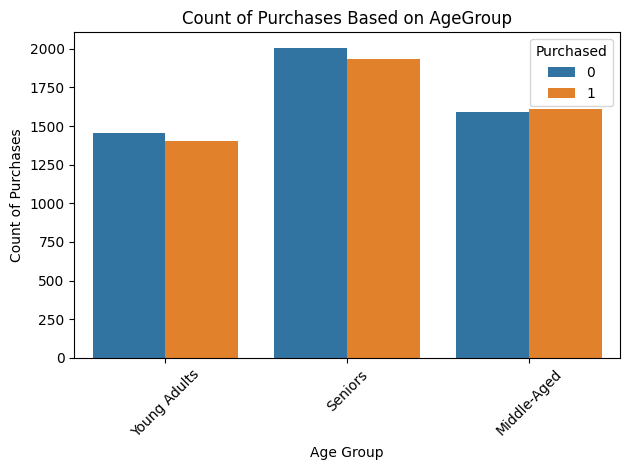

In [67]:
sns.countplot(x='age_group', hue='Purchased', data=df)

plt.title('Count of Purchases Based on AgeGroup')
plt.xlabel('Age Group')
plt.ylabel('Count of Purchases')

plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout
plt.show()

<h1>Correlation</h1>

<Axes: >

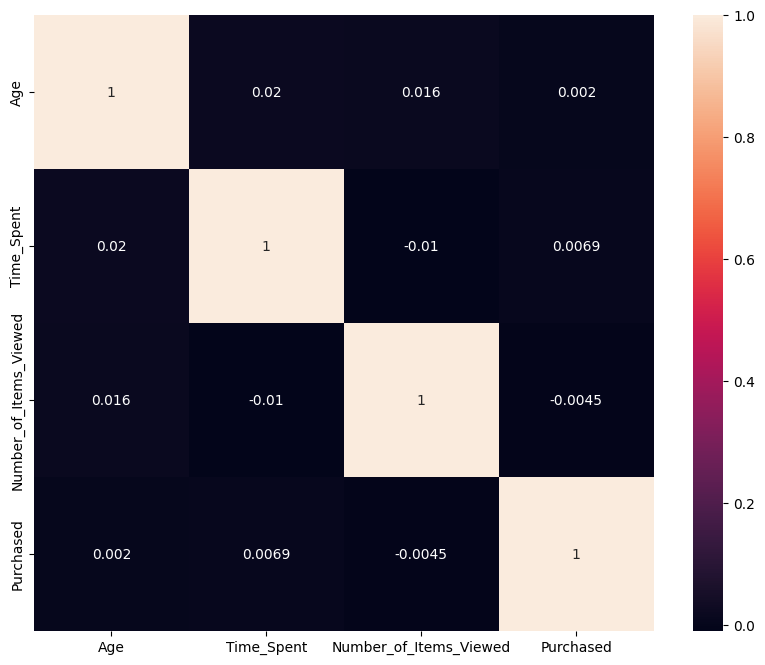

In [68]:
numerical_features = df[[column for column in df.columns if df[column].dtype != 'object']]
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_features.corr(), annot=True)

In [69]:
object_cols = df.select_dtypes(include='object').columns

# Apply get_dummies to the object-type columns
df_encoded = pd.get_dummies(df, columns=object_cols,)


<h1>Model Building</h1>

In [70]:
X_df=df.drop('Purchased',axis=1)
Y_df=df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.2, random_state=42)
# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)  # Use more iterations if necessary

# Train the model on the training data
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

<h1>Testing and Evaluating the Model</h1>

In [85]:
# Predict the outcomes on the test data
y_pred = lr_model.predict(X_test)


Confusion Matrix:
[[773 210]
 [800 217]]


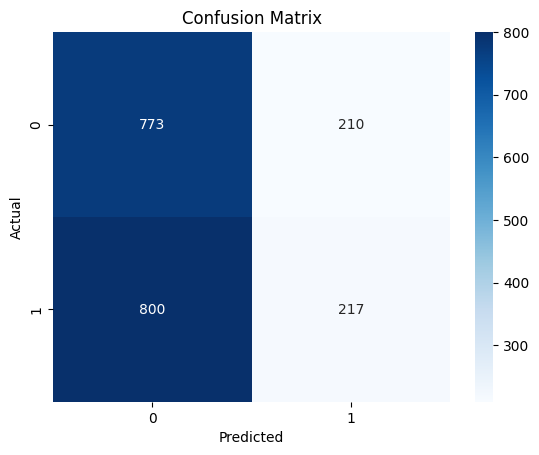

In [86]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [73]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report for precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 49.50%

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.79      0.60       983
           1       0.51      0.21      0.30      1017

    accuracy                           0.49      2000
   macro avg       0.50      0.50      0.45      2000
weighted avg       0.50      0.49      0.45      2000

